<a href="https://colab.research.google.com/github/hkaido0718/SupportRestriction/blob/main/Partial_Monotonicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partial Monotonicity
Let $D \in \{0, 1\}$ denote a treatment variable and $Z=(Z_1,Z_2) \in \{0,1\}^2$ instrumental variables. For example, $D$ is college attendance, $Z_1$ indicates whether the opportunity cost of college attendance is low, and $Z_2$ indicates the presence of a four-year college in a nearby area. Let $D(z_1, z_2)$ denote a potential treatment, and suppose the observed college attendance is generated by $D = D(Z_1, Z_2)$, where $Z$ is randomly assigned.
The partial monotonicity assumption of Mogstad et. al. (2021) states
\begin{align}
D(1,z_2)\geqslant_{a.s.} D(0,z_2), \text{ for }z_2\in \{0, 1\}, \text{ and }D(z_1,1)\geqslant_{a.s.} D(z_1,0), \text{ for }z_1 \in\{0,1\}.
\end{align}
We represent this model by a graph.

In [1]:
!git clone https://github.com/hkaido0718/SupportRestriction.git

Cloning into 'SupportRestriction'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25 (delta 9), reused 5 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 441.04 KiB | 4.01 MiB/s, done.
Resolving deltas: 100% (9/9), done.


We define nodes and a function that describes when the partial monotonicity assumption is violated.

In [2]:
import networkx as nx
from SupportRestriction.graph_analysis_utils import GraphAnalyzer
# Define nodes
nodes = [(d, z) for d in (0,1) for z in [(0,0),(0,1),(1,0),(1,1)]]

# Group function
group_fn = lambda node: node[1]  # group by z

# Partial monotonicity (describe when it is violated)
def violates_partial_monotonicity(u, v):
    d1, (z1_0, z1_1) = u
    d2, (z2_0, z2_1) = v
    # Movement along z0 only
    if z1_1 == z2_1:
        if z1_0 > z2_0 and d1 < d2:
            return True
        if z1_0 < z2_0 and d1 > d2:
            return True
    # Movement along z1 only
    if z1_0 == z2_0:
        if z1_1 > z2_1 and d1 < d2:
            return True
        if z1_1 < z2_1 and d1 > d2:
            return True
    # Diagonal movement (both increase or both decrease)
    if (z1_0 > z2_0 and z1_1 > z2_1 and d1 < d2) or \
       (z1_0 < z2_0 and z1_1 < z2_1 and d1 > d2):
        return True
    return False

# Build G using the same logic as used for clique checking
G = GraphAnalyzer.build_graph_pairwise(nodes, violates_partial_monotonicity,group_fn)

Let's plot $G$.

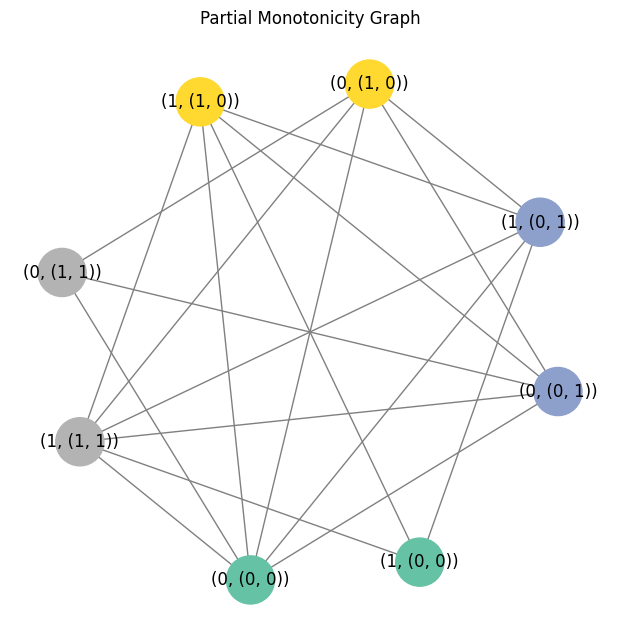

In [3]:
# Instantiate analyzer
analyzer = GraphAnalyzer(G, group_fn)

# Plot G
analyzer.plot_grouped_on_circle(title="Partial Monotonicity Graph", node_size=1200)


We obtain the maximal independent sets below.

In [4]:
# Obtain MIS
analyzer.print_mis_excluding_single_group()

Total MISs (excluding single-group ones): 5

1: [(0, (1, 1)), (1, (0, 1))]
2: [(0, (0, 1)), (1, (0, 0))]
3: [(0, (1, 1)), (1, (0, 0))]
4: [(0, (1, 0)), (1, (0, 0))]
5: [(0, (1, 1)), (1, (1, 0))]


They can be translated into the following testable implication.

\begin{align}
&~~P(D=1|Z=(0,0))+P(D=0|Z=(0,1))\leqslant 1\\
&~~P(D=1|Z=(0,1))+P(D=0|Z=(1,1))\leqslant 1\\
&~~P(D=1|Z=(0,0))+P(D=0|Z=(1,0))\leqslant 1\\
&~~P(D=1|Z=(1,0))+P(D=0|Z=(1,1))\leqslant 1\\
&~~P(D=1|Z=(0,0))+P(D=0|Z=(1,1))\leqslant 1.
\end{align}

Finally, let's check the model's regularity.

In [5]:
print(analyzer.is_perfect())
for row in analyzer.enumerate_cliques_and_check(violates_partial_monotonicity):
    status = "✅" if row['satisfies_condition'] else "❌"
    print(f"{row['index']:>2}: {row['clique']} — {status}")

True
 1: [(0, (0, 0)), (0, (0, 1)), (0, (1, 0)), (0, (1, 1))] — ✅
 2: [(0, (0, 0)), (0, (0, 1)), (0, (1, 0)), (1, (1, 1))] — ✅
 3: [(0, (0, 0)), (0, (0, 1)), (1, (1, 0)), (1, (1, 1))] — ✅
 4: [(0, (0, 0)), (0, (1, 0)), (1, (0, 1)), (1, (1, 1))] — ✅
 5: [(0, (0, 0)), (1, (0, 1)), (1, (1, 0)), (1, (1, 1))] — ✅
 6: [(1, (0, 0)), (1, (0, 1)), (1, (1, 0)), (1, (1, 1))] — ✅


The graph is perfect, and every maximal clique is a support point. Hence, the model is regular. The testable implication is sharp.

Now, we consider adding one more assumption. \begin{align}
D(1,0)\geqslant_{a.s.}D(0,1),~
\end{align}
we obtain the following ordering of the potential treatment:
\begin{align}
D(1,1)\geqslant_{a.s.}D(1,0)\geqslant_{a.s.}	D(0,1)\geqslant_{a.s.}D(0,0),
\end{align}
which satisfies the Imbens-Angrist (IA) monotonicity. The additional restriction rules out the $Z_2$-complier ($2c$). For this, we again define a function that determines when the IA monotonicity is violated for any pair of nodes.

In [6]:
# IA monotonicity
def violates_IA_monotonicity(u, v):
    d1, (z1_0, z1_1) = u
    d2, (z2_0, z2_1) = v
    # Movement along z0 only
    if z1_1 == z2_1:
        if z1_0 > z2_0 and d1 < d2:
            return True
        if z1_0 < z2_0 and d1 > d2:
            return True
    # Movement along z1 only
    if z1_0 == z2_0:
        if z1_1 > z2_1 and d1 < d2:
            return True
        if z1_1 < z2_1 and d1 > d2:
            return True
    # Diagonal movement (both increase or both decrease)
    if (z1_0 > z2_0 and z1_1 > z2_1 and d1 < d2) or \
       (z1_0 < z2_0 and z1_1 < z2_1 and d1 > d2):
        return True

    # In addition, we rule out D(1,0) < D(0,1)
    if (z1_0 > z2_0 and z1_1 < z2_1 and d1 < d2):
        return True
    return False

We then use the graph analyzer to obtain results.

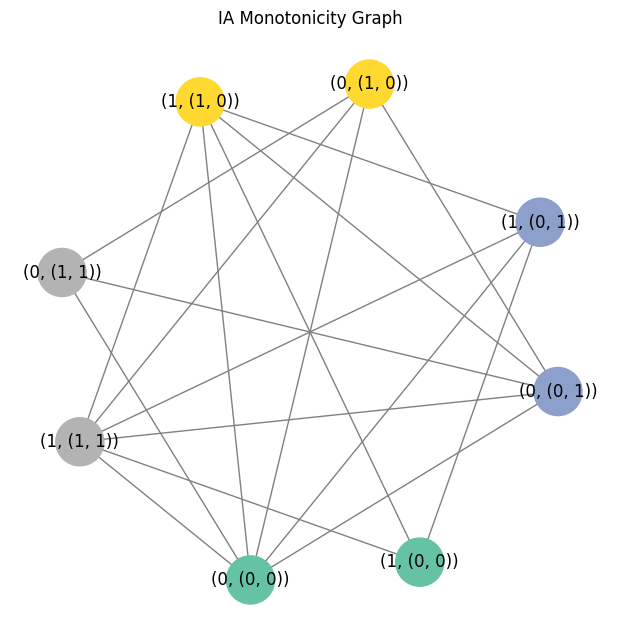

Total MISs (excluding single-group ones): 6

1: [(0, (1, 1)), (1, (0, 1))]
2: [(0, (1, 0)), (1, (0, 1))]
3: [(0, (0, 1)), (1, (0, 0))]
4: [(0, (1, 1)), (1, (0, 0))]
5: [(0, (1, 0)), (1, (0, 0))]
6: [(0, (1, 1)), (1, (1, 0))]
True
 1: [(0, (0, 0)), (0, (0, 1)), (0, (1, 0)), (0, (1, 1))] — ✅
 2: [(0, (0, 0)), (0, (0, 1)), (0, (1, 0)), (1, (1, 1))] — ✅
 3: [(0, (0, 0)), (0, (0, 1)), (1, (1, 0)), (1, (1, 1))] — ✅
 4: [(0, (0, 0)), (1, (0, 1)), (1, (1, 0)), (1, (1, 1))] — ✅
 5: [(1, (0, 0)), (1, (0, 1)), (1, (1, 0)), (1, (1, 1))] — ✅


In [7]:
# Build G using the same logic as used for clique checking
G_IA = GraphAnalyzer.build_graph_pairwise(nodes, violates_IA_monotonicity,group_fn)

# Instantiate analyzer
analyzer = GraphAnalyzer(G_IA, group_fn)

# Plot G
analyzer.plot_grouped_on_circle(title="IA Monotonicity Graph", node_size=1200)

# Obtain MIS
analyzer.print_mis_excluding_single_group()

# Check Regularity
print(analyzer.is_perfect())
for row in analyzer.enumerate_cliques_and_check(violates_IA_monotonicity):
    status = "✅" if row['satisfies_condition'] else "❌"
    print(f"{row['index']:>2}: {row['clique']} — {status}")

The additional restriction rules out the $Z_2$-complier ($2c$). This leads to a new maximal independent set, and hence a new inequality:
\begin{align}
&~~P(D=1|Z=(0,1))+P(D=0|Z=(1,0))\leqslant 1.
\end{align}